1. Recap
==


In the last mission, we focused on increasing the number of attributes the model uses. We saw how, in general, adding more attributes generally lowered the error of the model. This is because the model is able to do a better job identifying the living spaces from the training set that are the most similar to the ones from the test set. However, we also observed how using all of the available features didn't actually improve the model's accuracy automatically and that some of the features were probably not relevant for similarity ranking. We learned that selecting relevant features was the right lever when improving a model's accuracy, not just increasing the features used in the absolute.

In this mission, we'll focus on the impact of increasing <span style="background-color: #F9EBEA; color:##C0392B">k</span>, the number of nearby neighbors the model uses to make predictions. We exported both the training (<span style="background-color: #F9EBEA; color:##C0392B">train_df</span>) and test sets (<span style="background-color: #F9EBEA; color:##C0392B">test_df</span>) from the last missions to CSV files, <span style="background-color: #F9EBEA; color:##C0392B">dc_airbnb_train.csv</span> and <span style="background-color: #F9EBEA; color:##C0392B">dc_airbnb_test.csv</span> respectively. Let's read both these CSV's into Dataframes.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**: 

1. Read <span style="background-color: #F9EBEA; color:##C0392B">dc_airbnb_train.csv</span> into a Dataframe and assign to <span style="background-color: #F9EBEA; color:##C0392B">train_df</span>.
2. Read <span style="background-color: #F9EBEA; color:##C0392B">dc_airbnb_test.csv</span> into a Dataframe and assign to <span style="background-color: #F9EBEA; color:##C0392B">test_df</span>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

2. Hyperparameter optimization
==

When we vary the features that are used in the model, we're affecting the data that the model uses. On the other hand, varying the k value affects the behavior of the model independently of the actual data that's used when making predictions. In other words, we're impacting how the model performs without trying to change the data that's used.

Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as **hyperparameters**. The process of finding the optimal hyperparameter value is known as hyperparameter optimization. A simple but common [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization) technique is known as [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search), which involves:

- selecting a subset of the possible hyperparameter values,
- training a model using each of these hyperparameter values,
- evaluating each model's performance,
- selecting the hyperparameter value that resulted in the lowest error value.

Grid search essentially boils down to evaluating the model performance at different k values and selecting the k value that resulted in the lowest error. While grid search can take a long time when working with large datasets, the data we're working with in this mission is small and this process is relatively quick.

Let's confirm that grid search will work quickly for the dataset we're working with by first observing how the model performance changes as we increase the k value from <span style="background-color: #F9EBEA; color:##C0392B">1</span> to <span style="background-color: #F9EBEA; color:##C0392B">5</span>. If you recall, we set <span style="background-color: #F9EBEA; color:##C0392B">5</span> as the <span style="background-color: #F9EBEA; color:##C0392B">k</span> value for the last 2 missions. Let's use the features from the last mission that resulted in the best model accuracy:

- <span style="background-color: #F9EBEA; color:##C0392B">accommodates</span>
- <span style="background-color: #F9EBEA; color:##C0392B">bedrooms</span>
- <span style="background-color: #F9EBEA; color:##C0392B">bathrooms</span>
- <span style="background-color: #F9EBEA; color:##C0392B">number_of_reviews</span>

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**: 

1. Create a list containing the integer values **1**, **2**, **3**, **4**, and **5**, in that order, and assign to <span style="background-color: #F9EBEA; color:##C0392B">hyper_params</span>.
2. Create an empty list and assign to <span style="background-color: #F9EBEA; color:##C0392B">mse_values</span>.
3. Use a **for loop** to iterate over <span style="background-color: #F9EBEA; color:##C0392B">hyper_params</span> and in each iteration:
    - Instantiate a <span style="background-color: #F9EBEA; color:##C0392B">KNeighborsRegressor</span> object with the following parameters:
        - <span style="background-color: #F9EBEA; color:##C0392B">n_neighbors</span>: the current value for the iterator variable,
        - <span style="background-color: #F9EBEA; color:##C0392B">algorithm</span>: brute
    - Fit the instantiated k-nearest neighbors model to the following columns from <span style="background-color: #F9EBEA; color:##C0392B">train_df</span>:
        - <span style="background-color: #F9EBEA; color:##C0392B">accommodates</span>
        - <span style="background-color: #F9EBEA; color:##C0392B">bedrooms</span>
        - <span style="background-color: #F9EBEA; color:##C0392B">bathrooms</span>
        - <span style="background-color: #F9EBEA; color:##C0392B">number_of_reviews</span>
    - Use the trained model to make predictions on the same columns from <span style="background-color: #F9EBEA; color:##C0392B">test_df</span> and assign to <span style="background-color: #F9EBEA; color:##C0392B">predictions</span>.
    - Use the **mean_squared_error** function to calculate the MSE value between <span style="background-color: #F9EBEA; color:##C0392B">predictions</span> and the <span style="background-color: #F9EBEA; color:##C0392B">price</span> column from <span style="background-color: #F9EBEA; color:##C0392B">test_df</span>.
    - Append the MSE value to <span style="background-color: #F9EBEA; color:##C0392B">mse_values</span>.
4. Display <span style="background-color: #F9EBEA; color:##C0392B">mse_values</span> using the **print()** function.

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = list(range(1,6))
mse_values = []
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
    knn.fit(train_df[['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']], train_df['price'])
    predictions = knn.predict(test_df[['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']])
    mse_values.append(mean_squared_error(predictions, test_df['price']))

print(mse_values)
    

[26383.244596131968, 15152.847554038681, 14668.32890911389, 16079.745093856654, 14233.643139931741]


3. Expanding grid search
==

Since our dataset is small and scikit-learn has been developed with performance in mind, the code ran quickly. As we increased the k value from **1** to **5**, the MSE value fell from approximately <span style="background-color: #F9EBEA; color:##C0392B">26364</span> to approximately <span style="background-color: #F9EBEA; color:##C0392B">14114</span>:

| k | MSE                |
|---|--------------------|
| 1 | 26364.928327645051 |
| 2 | 15100.522468714449 |
| 3 | 14579.597901655923 |
| 4 | 16006.955844709897 |
| 5 | 14114.812468714448 |

Let's expand grid search all the way to a **k** value of **20**. While 20 may seem like an arbitrary ending point for our grid search, we can always expand the values we try if we're unconvinced that the lowest MSE value is associated with one of the hyperparamter values we tried so far.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**: 

1. Change the list of hyperparameter values in the previous exercise, <span style="background-color: #F9EBEA; color:##C0392B">hyper_params</span>, so it ranges from **1** to **20**.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = list(range(1,21))
mse_values = []
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
    knn.fit(train_df[['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']], train_df['price'])
    predictions = knn.predict(test_df[['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']])
    mse_values.append(mean_squared_error(predictions, test_df['price']))

print(mse_values)

[26383.244596131968, 15152.847554038681, 14668.32890911389, 16079.745093856654, 14233.643139931741, 13781.359025407659, 13932.903995727982, 14015.416293373151, 14040.643997808958, 14214.452400455062, 14323.282373847065, 14588.854711793701, 14576.310270546817, 14573.683493533936, 14642.491240045507, 14687.59449214306, 14719.012451236267, 14725.675413278275, 14780.722616672812, 14755.384158134244]


4. Visualizing hyperparameter values
==

As we increased the <span style="background-color: #F9EBEA; color:##C0392B">k</span> value from <span style="background-color: #F9EBEA; color:##C0392B">1</span> to <span style="background-color: #F9EBEA; color:##C0392B">6</span>, the MSE value decreased from approximately <span style="background-color: #F9EBEA; color:##C0392B">26364</span> to approximately <span style="background-color: #F9EBEA; color:##C0392B">13543</span>. However, as we increased the <span style="background-color: #F9EBEA; color:##C0392B">k</span> value from <span style="background-color: #F9EBEA; color:##C0392B">7</span> to <span style="background-color: #F9EBEA; color:##C0392B">20</span>, the MSE value didn't decrease further but instead hovered between approximately 14285 and 14849. This means that the optimal <span style="background-color: #F9EBEA; color:##C0392B">k</span> value is <span style="background-color: #F9EBEA; color:##C0392B">6</span>, since it resulted in the lowest MSE value.

This pattern is something you'll notice while performing grid search across other models as well. As you increase <span style="background-color: #F9EBEA; color:##C0392B">k</span> at first, the error rate decreases until a certain point, but then rebounds and increases again. Let's confirm this behavior visually using a scatter plot.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**: 

1. Use the seaborn to generate a scatter plot with:
    - **hyper_params** on the x-axis,
    - **mse_values** on the y-axis.
2. Use plt.show() to display the scatter plot.

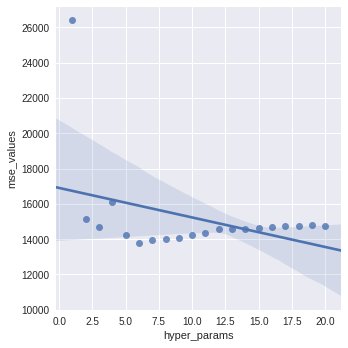

In [21]:
import seaborn as sns
data = pd.DataFrame({'hyper_params': hyper_params, 'mse_values': mse_values})
sns.lmplot(x = 'hyper_params', y = 'mse_values', data=data)

5. Varying features and hyperparameters
==

From the scatter plot, you can tell that the lowest MSE value was achieved at the <span style="background-color: #F9EBEA; color:##C0392B">k</span> value of <span style="background-color: #F9EBEA; color:##C0392B">6</span>. As we increased <span style="background-color: #F9EBEA; color:##C0392B">k</span> past <span style="background-color: #F9EBEA; color:##C0392B">6</span>, the MSE actually increased and hovered but never decreased below 13543 (the approximate MSE value when <span style="background-color: #F9EBEA; color:##C0392B">k</span> was <span style="background-color: #F9EBEA; color:##C0392B">6</span>).

Since varying the <span style="background-color: #F9EBEA; color:##C0392B">k</span> value decreased the MSE value for this model, you may be wondering if repeating the grid search process for one of the models from the last mission that performed poorly when we fixed <span style="background-color: #F9EBEA; color:##C0392B">k</span> to <span style="background-color: #F9EBEA; color:##C0392B">5</span> would result in a lower MSE value. Let's try it out!


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**: 


1. Use a for loop to iterate over <span style="background-color: #F9EBEA; color:##C0392B">hyper_params</span> and in each iteration:
    - Instantiate a <span style="background-color: #F9EBEA; color:##C0392B">KNeighborsRegressor</span> object with the following parameters:
        - <span style="background-color: #F9EBEA; color:##C0392B">n_neighbors</span>: the current value for the iterator variable,
        - <span style="background-color: #F9EBEA; color:##C0392B">algorithm</span>: brute
    - Fit the instantiated k-nearest neighbors model to all of the columns, except for the <span style="background-color: #F9EBEA; color:##C0392B">price</span> column, from <span style="background-color: #F9EBEA; color:##C0392B">train_df</span>
    - Use the trained model to make predictions on the same columns from <span style="background-color: #F9EBEA; color:##C0392B">test_df</span> and assign to <span style="background-color: #F9EBEA; color:##C0392B">predictions</span>.
    - Use the <span style="background-color: #F9EBEA; color:##C0392B">mean_squared_error</span> function to calculate the MSE value between <span style="background-color: #F9EBEA; color:##C0392B">predictions</span> and the <span style="background-color: #F9EBEA; color:##C0392B">price</span> column from <span style="background-color: #F9EBEA; color:##C0392B">test_df</span>.
    - Append the MSE value to <span style="background-color: #F9EBEA; color:##C0392B">mse_values</span>.
2. Use the seaborn to generate a scatter plot with:
    - <span style="background-color: #F9EBEA; color:##C0392B">hyper_params</span> on the x-axis,
    - <span style="background-color: #F9EBEA; color:##C0392B">mse_values</span> on the y-axis.
3. Use <span style="background-color: #F9EBEA; color:##C0392B">plt.show()</span> to display the scatter plot.

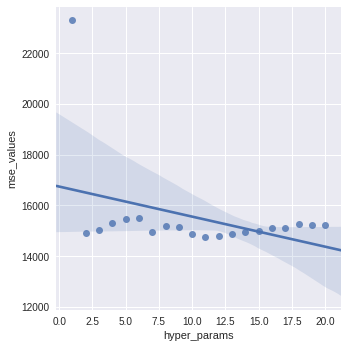

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = list(range(1,21))
mse_values = []
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
    knn.fit(train_df.drop(['price'], axis=1), train_df['price'])
    predictions = knn.predict(test_df.drop(['price'], axis=1))
    mse_values.append(mean_squared_error(predictions, test_df['price']))

import seaborn as sns
data = pd.DataFrame({'hyper_params': hyper_params, 'mse_values': mse_values})
sns.lmplot(x = 'hyper_params', y = 'mse_values', data=data)

6. Practice the workflow
==

You may have noticed that the general workflow for finding the best model is:

- select relevant features to use for predicting the target column.
- use grid search to find the optimal hyperparameter value for the selected features.
- evaluate the model's accuracy and repeat the process.

Let's now practice this workflow.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**: 

1. While using only the <span style="background-color: #F9EBEA; color:##C0392B">accommodates</span> and <span style="background-color: #F9EBEA; color:##C0392B">bathrooms</span> columns:
    - Train a model for each <span style="background-color: #F9EBEA; color:##C0392B">k</span> value between **1** and **20** using the training data.
    - Use each model to make predictions on the test set (using just the <span style="background-color: #F9EBEA; color:##C0392B">accommodates</span> and <span style="background-color: #F9EBEA; color:##C0392B">bathrooms</span> columns).
    - Calculate each model's MSE value by comparing each set of predictions to the true <span style="background-color: #F9EBEA; color:##C0392B">price</span> values.
    - Find the **k** value that obtained the lowest MSE value.
    - Create a dictionary named <span style="background-color: #F9EBEA; color:##C0392B">two_hyp_mse</span> that contains 1 key-value pair:
        - **key**: k value that resulted in lowest MSE value.
        - **value**: corresponding MSE value.
2. Repeat this process while using only the <span style="background-color: #F9EBEA; color:##C0392B">accommodates</span>, <span style="background-color: #F9EBEA; color:##C0392B">bathrooms</span> and <span style="background-color: #F9EBEA; color:##C0392B">bedrooms</span> columns:
    - Create a dictionary named <span style="background-color: #F9EBEA; color:##C0392B">three_hyp_mse</span> that contains 1 key-value pair:
        - **key**: k value that resulted in lowest MSE value.
        - **value**: corresponding MSE value.
3. Display both <span style="background-color: #F9EBEA; color:##C0392B">two_hyp_mse</span> and <span style="background-color: #F9EBEA; color:##C0392B">three_hyp_mse</span> using the **print()** function.

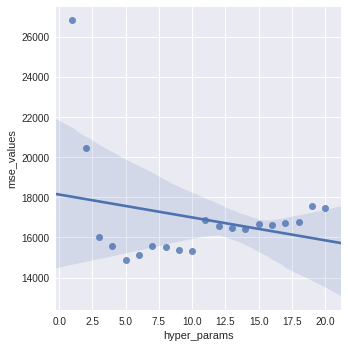

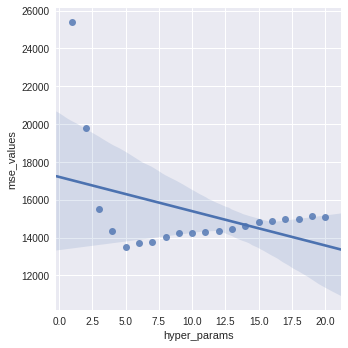

In [65]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

# put your code here
for k in hyper_params:
    knn2 = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
    knn3 = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
    
    knn2.fit(train_df[two_features], train_df['price'])
    knn3.fit(train_df[three_features], train_df['price'])
    
    predictions2 = knn2.predict(test_df[two_features])
    predictions3 = knn3.predict(test_df[three_features])    
    
    two_mse_values.append(mean_squared_error(predictions2, test_df['price']))
    three_mse_values.append(mean_squared_error(predictions3, test_df['price']))

import seaborn as sns
data_two = pd.DataFrame({'hyper_params': hyper_params, 'mse_values': two_mse_values})
data_three = pd.DataFrame({'hyper_params': hyper_params, 'mse_values': three_mse_values})
sns.lmplot(x = 'hyper_params', y = 'mse_values', data=data_two)
sns.lmplot(x = 'hyper_params', y = 'mse_values', data=data_three)

In [66]:
data_two = data_two.sort_values('mse_values', ascending = True)
data_three = data_three.sort_values('mse_values', ascending = True)

In [67]:
two_hyp_mse[data_two.hyper_params.iloc[0]] = data_two.mse_values.iloc[0]
three_hyp_mse[data_three.hyper_params.iloc[0]] = data_three.mse_values.iloc[0]

In [68]:
print(two_hyp_mse)
print(three_hyp_mse)

{5: 14875.319590443689}
{5: 13494.16850967008}


7. Next steps
==

The first model, which used the <span style="background-color: #F9EBEA; color:##C0392B">accommodates</span> and <span style="background-color: #F9EBEA; color:##C0392B">bathrooms</span> columns, was able to achieve an MSE value of approximately 14787. The second model, which added the <span style="background-color: #F9EBEA; color:##C0392B">bedrooms</span> column, was able to achieve an MSE value of approximately 13518, which is even lower than the lowest MSE value we achieved using the best model from the last mission (which used the <span style="background-color: #F9EBEA; color:##C0392B">accommodates</span>, <span style="background-color: #F9EBEA; color:##C0392B">bathrooms</span>, <span style="background-color: #F9EBEA; color:##C0392B">bedrooms</span> and <span style="background-color: #F9EBEA; color:##C0392B">number\_of\_reviews</span> columns). Hopefully this demonstrates that using just one lever to find the best model isn't enough and you really want to use both levers in conjunction.

In this mission, we learned about hyperparameter optimization and the workflow of finding the optimal model to make predictions. 